# DS-211 : Aug-2021 : PS-2

## **Question : 1** 


**Steepest Descent and Newton's Line Search Methods**

Consider the following quadratic functions:
1. $f_1(x) = \frac{1}{2} x^T A_1 x $
  
  where 
$A_1 = 
  \begin{pmatrix}
  1 & 0 \\
  0 & 1 \\
  \end{pmatrix}$

2. $f_2(x) = \frac{1}{2} x^T A_2 x $
  
  where 
$A_2 = 
  \begin{pmatrix}
  10 & 8 \\
  8 & 10 \\
  \end{pmatrix}$





1. Find the minima $x^*$ for the given functions $f_1(x)$ and  $f_2(x)$ using your own implementation of Steepest Descent. Compute the step lenght by implementing the backtracking algorithm (Algorithm 3.1 Nocedal and Wright) with $\rho = 0.9$ and $c = 10^{-4}$. **[1.5 Points]**

2. Find the minima $x^*$ for the given functions $f_1(x)$ and  $f_2(x)$ using your own implementation of Newton's Method. **[1 Point]**

Notes:
1. Run both algorithms for two initial guesses. i. $x_0=(2,0)$ and ii. $x_0=(2,2)$
2. Stop iterations when $||x_{k+1} - x_{k}||_2^2 < 10^{-5}$
3. For each case report the solution and the number of iterations to converge. Also comment on the reported number of iterations.
4. Show the function contour plot and the iterates {$x_k$} including the solution.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Backtracking algorithm 
def steepest_descent(x,A):
  res = []
  rho = 0.9
  c = 1e-4
  alpha = 0.1
  A1 = A
  grad_x = A1 @ x                    # gradient 
  pk = -grad_x                       #direction of gradient
  fx1 = 0.5 * (x+alpha*pk).T @ A1 @ (x+alpha*pk)
  fx = 0.5 * (x.T @ A1 @ x)
  while fx1 >= fx + c*alpha*grad_x.T @ pk:
    alpha = rho * alpha
    fx1 = 0.5*(x+alpha*pk).T @ A1 @ (x+alpha*pk)
    fx = 0.5*(x).T @ A1 @ (x)
  itr = 0
  res.append(x)
  while True:
    grad_x = A1 @ x   
    xk = x - alpha * grad_x 
    res.append(xk)
    if (x-xk).T @ (x-xk) < 1e-5:
      break
    x = xk
    itr+=1
  print("Number for iteration = ",itr) 
  print("step_size = ",alpha)
  return itr,alpha,res

In [3]:
def loss2_(z,A):
  loss = (z.T @ A @ z)/2 
  return loss

In [4]:
def newtons(x,A):
  res = []
  rho = 0.9
  c = 1e-4
  alpha = 0.1
  A1 = A
  H = A1
  grad_x = A1 @ x                    # gradient 
  pk = -np.linalg.inv(H) @ grad_x                      #direction of gradient
  fx1 = 0.5 * (x+alpha*pk).T @ A1 @ (x+alpha*pk)
  fx = 0.5 * (x.T @ A1 @ x)
  while fx1 >= fx + c*alpha*grad_x.T @ pk:
    alpha = rho * alpha
    fx1 = 0.5*(x+alpha*pk).T @ A1 @ (x+alpha*pk)
    fx = 0.5*(x).T @ A1 @ (x)
  itr = 0
  res.append(x)
  while True:
    grad_x = A1 @ x  
    pk = -np.linalg.inv(H) @ grad_x
    xk = x + alpha * pk 
    res.append(xk)
    if (x-xk).T @ (x-xk) < 1e-5:
      break
    x = xk
    itr+=1
  print("Number for iteration = ",itr) 
  print("step_size = ",alpha)
  return itr,alpha,res

In [5]:
def contour_plot(old_w,A,str):
  nums = 100
  feature_x = np.linspace(-4.0, 4, nums)
  feature_y = np.linspace(-4.0, 4.0, nums)
    
  # Creating 2-D grid of features
  [X, Y] = np.meshgrid(feature_x, feature_y)
  all_ws = np.array(old_w)
  Z= np.zeros(shape = [nums,nums])
  for i in range(nums):
    for j in range(nums):
      p = X[i,j]
      q = Y[i,j]
      z = np.array([p,q]).reshape(-1,1)
      Z[i,j] = loss2_(z,A)
  plt.figure(figsize=(10,10))
  plt.contourf(X, Y, Z,20,alpha=.7,dpi=500)
  plt.axhline(0, color='black', alpha=.5, dashes=[2, 4],linewidth=1)
  plt.axvline(0, color='black', alpha=0.5, dashes=[2, 4],linewidth=1)
  for i in range(len(old_w) - 1):
    plt.annotate('', xy=all_ws[i + 1, :], xytext=all_ws[i, :],
                 arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                 va='center', ha='center')
 
  CS = plt.contour(X, Y, Z,linewidths=1,colors='black')
  plt.clabel(CS, inline=1, fontsize=8)
  plt.title(str)
  plt.xlabel("w0")
  plt.ylabel("w1")
  #plt.show()

## Newton method solution for f1(x) with initial guess x0 and x1

For initial guess x0
Number for iteration =  40
step_size =  0.1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'dpi'


For initial guess x1
Number for iteration =  43
step_size =  0.1


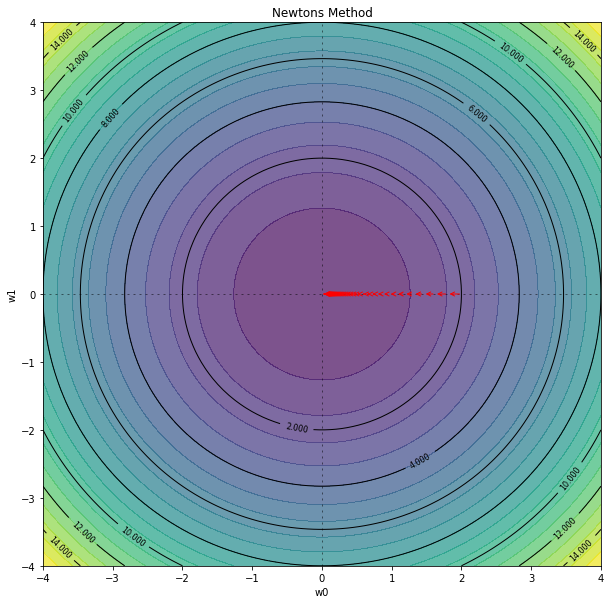

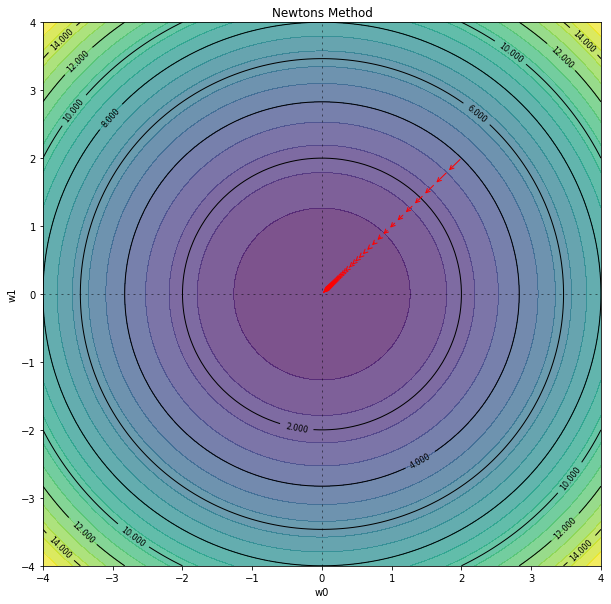

In [6]:
print("For initial guess x0")
itr,alpha,old = newtons(np.array([[2],[0]]),np.array([[1,0],[0,1]]))
contour_plot(old,np.array([[1,0],[0,1]]),'Newtons Method')
print("For initial guess x1")
itr,alpha,old = newtons(np.array([[2],[2]]),np.array([[1,0],[0,1]]))
contour_plot(old,np.array([[1,0],[0,1]]),'Newtons Method')
plt.show()

## Newton method solution for f2(x) with initial guess x0 and x1

For initial guess x0
Number for iteration =  40
step_size =  0.1
For initial guess x1
Number for iteration =  43
step_size =  0.1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'dpi'


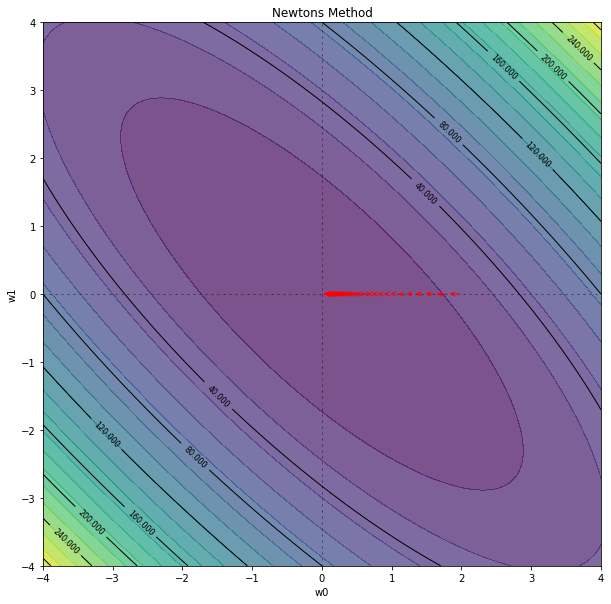

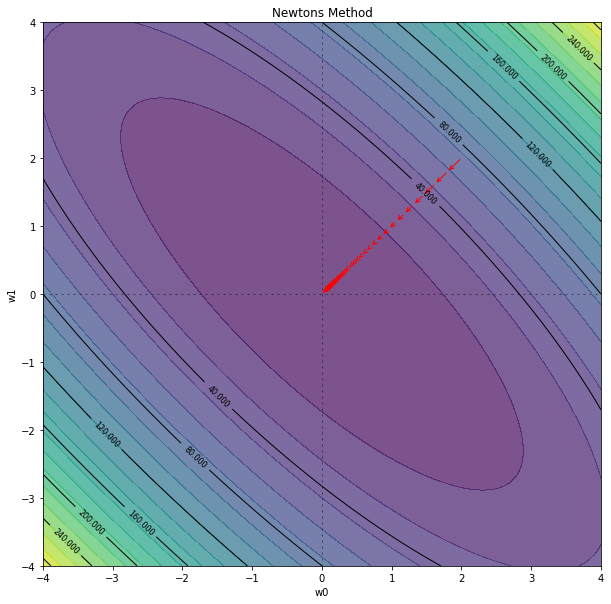

In [7]:
print("For initial guess x0")
itr,alpha,old = newtons(np.array([[2],[0]]),np.array([[10,8],[8,10]]))
contour_plot(old,np.array([[10,8],[8,10]]),'Newtons Method')
print("For initial guess x1")
itr,alpha,old = newtons(np.array([[2],[2]]),np.array([[10,8],[8,10]]))
contour_plot(old,np.array([[10,8],[8,10]]),'Newtons Method')
plt.show()

## Steepest descent method solution for f1(x) with initial guess x0 and x1

For initial guess x0
Number for iteration =  40
step_size =  0.1
For initial guess x1
Number for iteration =  43
step_size =  0.1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'dpi'


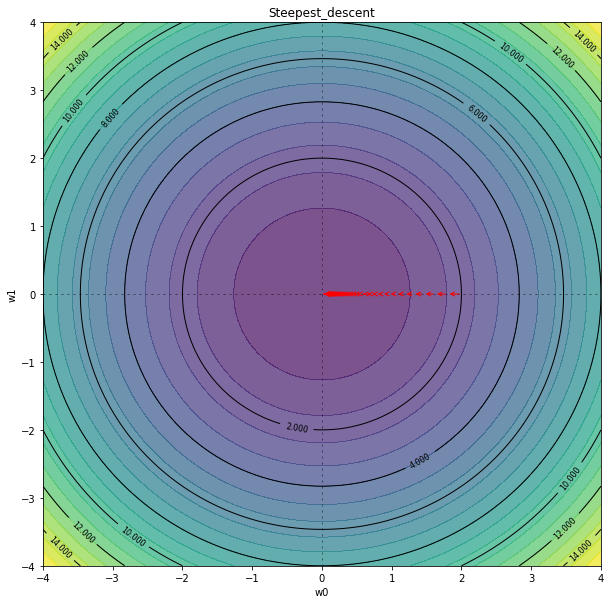

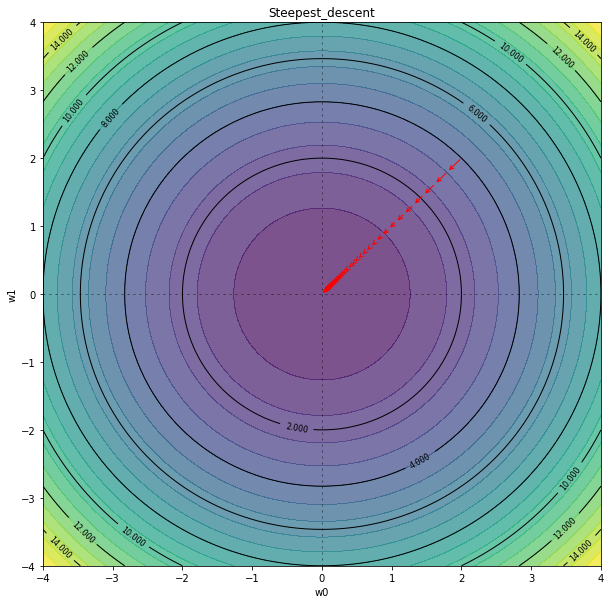

In [8]:
print("For initial guess x0")
itr,alpha,old = steepest_descent(np.array([[2],[0]]),np.array([[1,0],[0,1]]))
contour_plot(old,np.array([[1,0],[0,1]]),'Steepest_descent')
print("For initial guess x1")
itr,alpha,old = steepest_descent(np.array([[2],[2]]),np.array([[1,0],[0,1]]))
contour_plot(old,np.array([[1,0],[0,1]]),'Steepest_descent')
plt.show()

For initial guess x0
Number for iteration =  31
step_size =  0.1
For initial guess x1
Number for iteration =  34
step_size =  0.1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'dpi'


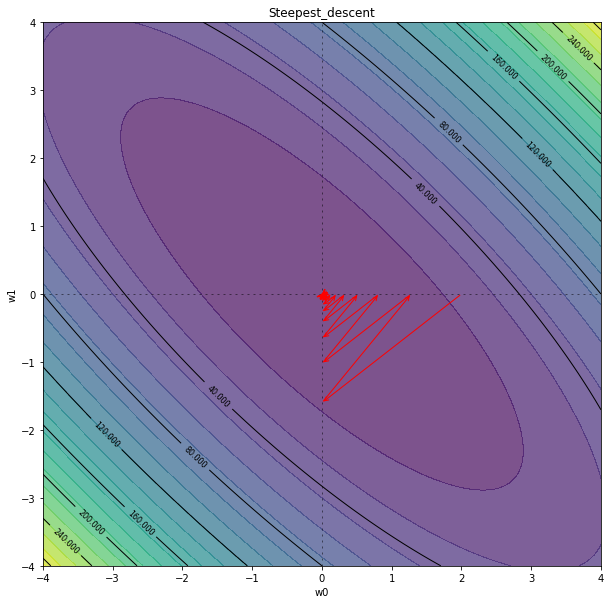

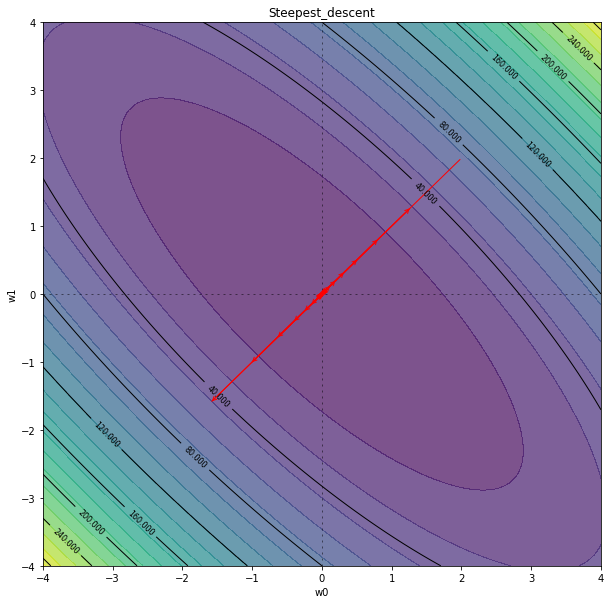

In [9]:
print("For initial guess x0")
itr,alpha,old = steepest_descent(np.array([[2],[0]]),np.array([[10,8],[8,10]]))
contour_plot(old,np.array([[10,8],[8,10]]),'Steepest_descent')
print("For initial guess x1")
itr,alpha,old = steepest_descent(np.array([[2],[2]]),np.array([[10,8],[8,10]]))
contour_plot(old,np.array([[10,8],[8,10]]),'Steepest_descent')
plt.show()

# **Comments**
*   Number of iteration for solution of f1(x) problem is same for both the method since it is a circle or A1 is a identity matrix
*   Number of iteration for second problem is less for steepest descent method than newtons method for same stepsize of 0.1
*   For step size of 1 newton method and steepest descent method for first problem converges in one iteration.






# **Question : 2**

**Stochastic Gradient Descent**

Download the data [here](https://drive.google.com/file/d/19H5bjePCXkEoaeoseDh6SymjOuJVFMqH/view?usp=sharing) $(X, Y)$ for a linear regreassion problem, where $X = [x_1, x_2, ..., x_n]^T$ and $Y = [y_1, y_2, ... , y_n]^T$. You must find the best fit for the model $Y=pX+q$ where $p$ and $q$ are scalars.

1. Formulate the quadratic loss function for the Mean Squared Error of the general form $\frac{1}{2} z^T A z  + b^T z + c$, where $z = [p, q]^T$. Write $A$ and $b$ in terms of $X$ and $Y$. Also re-write the same in terms of $x_i, y_i, p$ and $q$. **[0.5 Points]**

2. Implement the vanilla Stochastic Gradient Descent algorithm (sample $1$ without replacement out of the $n$ gradients) to minimize the forumulated loss function. Experiment with the step lengths of 0.01 and 0.1 (Keep step lengths constant across iterations). Use initial guess as $x_0 = [0,0]^T$ **[1 Points]**

3. Compare results with your Gradient Descent implementation. **[0.5 Points]**

4. Solve the above problem by using scikit-learn's implementation of stochastic gradient descent named sklearn.linear_model.SGDRegressor. [Click here for documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor). **[0.5 Points]**

Notes:
1. Stop iterations when $||x_{k+1} - x_{k}||_2^2 < 10^{-5}$
3. For each case report the solution and the number of iterations to converge. Comment on the number of iterations. 
4. Show the function contour plot and the iterates {$x_k$} including the solution for questions Q2.2 and Q2.3. For Q2.2 comment on the iterate sequence obtained for the two step-lengths.
4. For Q2.4, make a scatter plot for given data $X$ vs $Y$. Let $Y\_pred$ be the model prediction on the same $X$. Make a scatter plot for $X$ vs $Y\_pred$ in the same figure.


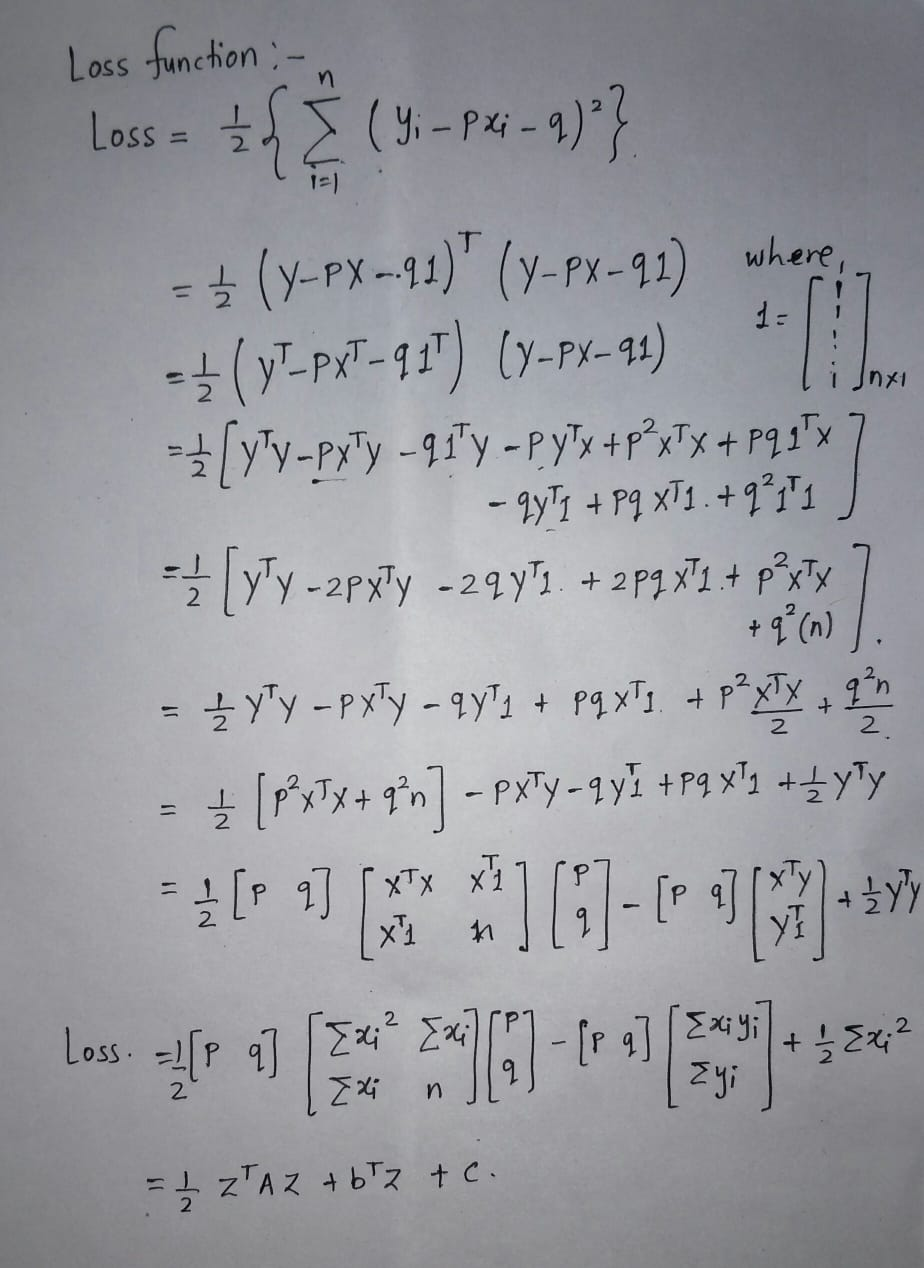

In [10]:
import numpy as np
import random

In [11]:
data = np.load('PS2_q2_data.npy')
X = np.array(data[:,0])
X = np.reshape(X,(-1,1))
Y = np.array(data[:,1])
Y = np.reshape(Y,(-1,1))

In [12]:
A = np.zeros((2,2))
a = X.T @ X
A[0][0] = a[0][0]
A[0][1] = sum(X)
A[1][0] = sum(X)
A[1][1] = 100

b = np.zeros((2,1))
b[0][0] = -X.T @ Y
b[1][0] = -sum(Y)

c = Y.T @ Y
c = c/2

In [13]:
def loss_(z,A,b,c):
  loss = (z.T @ A @ z)/2 + (b.T @ z) + c
  return loss
  

In [14]:
def solution(step):
  error = []
  old_w1 = []
  old_w2 = []
  #Implementation of stochastic gradient descent method
  samples = random.sample(range(0, 100), 100)
  step_len = step
  x = np.zeros((2,1))
  #grad_x = A @ x + b
  itr = 0
  flag = 0
  count = 0
  p = 0
  q = 0
  #Stochastic Gradient descent method
  while flag == 0:
    for i in samples:
      x_ = X[i][0]
      y = Y[i][0]
      y_ = p * x_ + q
      loss = (y - y_)**2
      grad_p = (y - p*x_ - q) * (-x_)
      grad_q = -(y - p*x_ - q) 
      grad = np.array([[ grad_p],[grad_q]])
      grad = np.reshape(grad,(2,1))
      xk = x - step_len * grad
      old_w1.append(xk)
      norm_ = np.linalg.norm((x - xk),2)
      count += 1
      p = xk[0][0]
      q = xk[1][0]
      x = xk
      if norm_**2 < 1e-5:
        flag = 1
        break
  print("Number of iteration of SGD = ",count)
  x = np.zeros((2,1))
  # Gradient descent Method
  error.append(loss_(x,A,b,c))
  while True:
    grad_x = (A @ x + b)/100
    xk = x - step_len * grad_x
    old_w2.append(xk)
    norm_ = (x-xk).T @ (x-xk)
    x = xk
    itr += 1
    error.append(loss_(x,A,b,c))
    if norm_ < 1e-5:
      break
  print("Number of iteration of Gradient descent = ",itr)
  return old_w1, old_w2

In [15]:
import matplotlib.pyplot as plt
def contour_plot_(old_w,str):
  nums = 100
  feature_x = np.linspace(-1, 3.0, nums)
  feature_y = np.linspace(-2.0, 4.0, nums)
    
  # Creating 2-D grid of features
  [X, Y] = np.meshgrid(feature_x, feature_y)
  all_ws = np.array(old_w)
  Z= np.zeros(shape = [nums,nums])
  for i in range(nums):
    for j in range(nums):
      p = X[i,j]
      q = Y[i,j]
      z = np.array([p,q]).reshape(-1,1)
      Z[i,j] = loss_(z,A,b,c)
  plt.figure(figsize=(7,7))
  plt.contourf(X, Y, Z,20,alpha=.7)
  plt.axhline(0, color='black', alpha=.5, dashes=[2, 4],linewidth=1)
  plt.axvline(0, color='black', alpha=0.5, dashes=[2, 4],linewidth=1)
  for i in range(len(old_w) - 1):
    plt.annotate('', xy=all_ws[i + 1, :], xytext=all_ws[i, :],
                 arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                 va='center', ha='center')
 
  CS = plt.contour(X, Y, Z,linewidths=1,colors='black')
  plt.clabel(CS, inline=1, fontsize=8)
  plt.title(str)
  plt.xlabel("w0")
  plt.ylabel("w1")
  plt.show()

## For the step size 0.1

Number of iteration of SGD =  36
Number of iteration of Gradient descent =  91


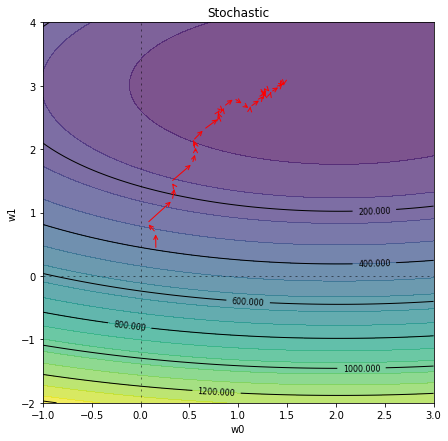

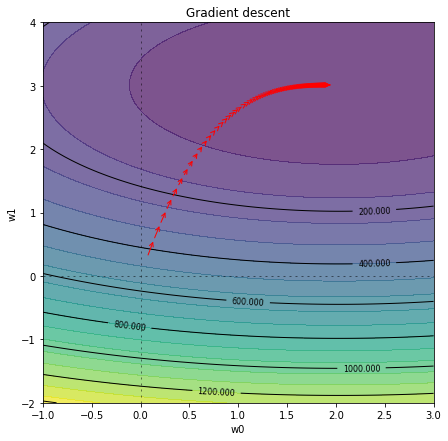

In [19]:
old_w1, old_w2 = solution(0.1)
contour_plot_(old_w1,'Stochastic')
contour_plot_(old_w2,'Gradient descent')

## For the step size 0.01

Number of iteration of SGD =  55
Number of iteration of Gradient descent =  285


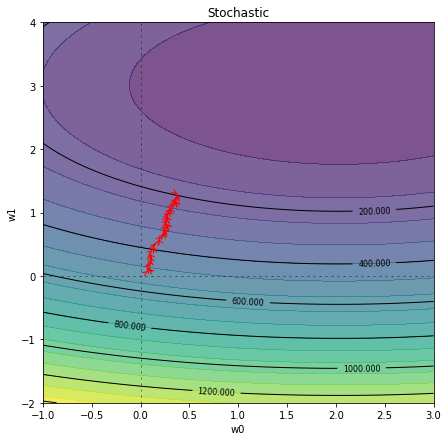

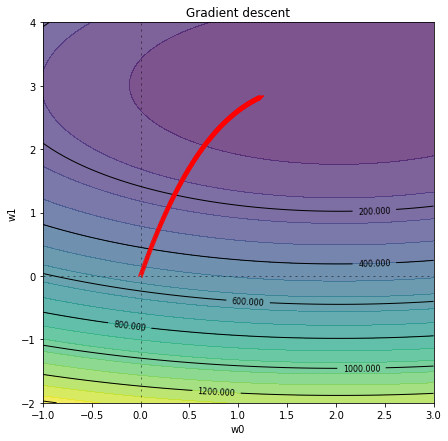

In [17]:
old_w1, old_w2 = solution(0.01)
contour_plot_(old_w1,'Stochastic')
contour_plot_(old_w2,'Gradient descent')

*   From the above graph,we observe that the path of iterator is zig-zag pattern because in stochastic gradient descent method only single example is considered for calculation of gradient randomly from the data(stochastic nature of problem).
*   In gradient descent method entire data samples are used to calcualate gradient which gives true gradient of data.



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


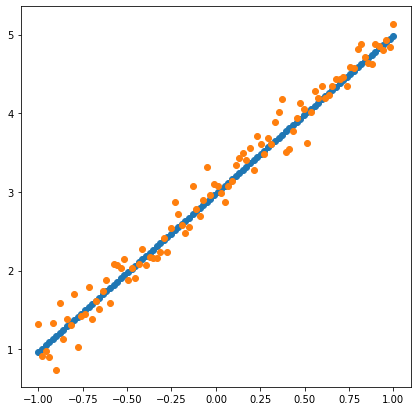

In [18]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X,Y)
y_pred = reg.predict(X)
plt.figure(figsize=(7,7))
plt.scatter(X,y_pred)
plt.scatter(X,Y)